# Socio-Economic Impact Study Using Machine Learning on Titanic Dataset 

## Introduction
Socio-economic disparities play a significant role in shaping outcomes during crisis, such as survival rates during the Titanic disaster. Understanding how the socio- economic factors like class, fare, and gender influenced the survival sheds light on the historical inequalities and contributes to the development of more egalitarian emergency response planning systems today.

Machine learning models can be employed to analyze the Titanic dataset, identify patterns, and predict survival outcomes. By leveraging socio-economic features like passenger class and fare, these models can uncover critical predictors and evaluate their influence on survival probabilities.

This notebook aims to explore the impact of socio- economic factors, such as class and fare, on survival rates and provide insights into historical inequalities. By utilizing machine learning models, this study will identify the influence of socio-economic factors on survival and predict survival outcomes. The findings can guide discussions on equitable emergency response strategies and improve understanding of historical biases.

We compare multiple machine learning models based on accuracy and ROC AUC metrics, followed by saving the best-performing model.

---

## Steps Outline:

1. **Data Overview**:
   - Explore the Titanic dataset, understand the key features, and define the target variable.
   - Identify and handle missing values, outliers, and inconsistencies in the dataset.
     

2. **Exploratory Data Analysis (EDA)**:
   - Analyze and visualize the dataset to understand relationships between features.
   - Identify missing values, outliers, and correlations.
     

3. **Data Preprocessing**:
   - Impute missing values using `SimpleImputer`.
   - Scale numeric features using `RobustScaler`.
   - Apply one-hot encoding for categorical variables.
   - Use `ColumnTransformer` to combine these steps.
     

4. **Model Development**:
   - Train and evaluate the following models:
     - Logistic Regression
     - Random Forest
     - Support Vector Machine
     - K-Nearest Neighbors
     - Decision Tree
     - Gradient Boosting
       

5. **Performance Evaluation**:
   - Compare models using **Accuracy** and **ROC AUC**.
     

6. **Model Selection**:
   - **Random Forest** was chosen for its highest **ROC AUC** (`0.8923`), indicating the best balance between accuracy and the ability to distinguish between classes.
     

6. **Model Saving**:
   - Save the Random Forest model using `joblib` for deployment.
     

7. **Submission**:
   - Generate predictions on the test set and prepare `submission.csv` for Kaggle submission.
     

---

## Understanding the Data

The Titanic dataset contains demographic and travel-related information for passengers aboard the Titanic. The goal is to predict whether a passenger survived the disaster (target variable: `Survived`).

### Key Features:
- **PassengerId**: Unique identifier for each passenger.
- **Pclass**: Passenger's class (1st, 2nd, 3rd).
- **Name**: Passenger's name.
- **Sex**: Passenger's gender (male or female).
- **Age**: Passenger's age.
- **SibSp**: Number of siblings or spouses aboard the Titanic.
- **Parch**: Number of parents or children aboard the Titanic.
- **Ticket**: Ticket number.
- **Fare**: Passenger's fare.
- **Cabin**: Cabin number.
- **Embarked**: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton).

### Target Variable:
- **Survived**: 1 if the passenger survived, 0 if not.

### Approach:
- **Identify Missing Values**: Missing values are present in the `Age`, `Cabin`, and `Embarked` columns. We'll impute the missing data using appropriate strategies (median for numerical, most frequent for categorical).
- **Understand the Data Distributions**: Visualize key variables like `Age`, `Fare`, `Pclass`, and their correlation with `Survived` to understand their impact on the target.
- **Feature Engineering**: Create new features like `FamilySize` to enhance the model's predictive power.

---

## Exploratory Data Analysis (EDA)

### Visualizations:
- Passenger class distribution (`Pclass`).
- Age distribution, including missing values.
- Survival distribution by sex, age, and class.
- Family size and its correlation with survival (`FamilySize` feature derived from `SibSp` and `Parch`).

### Family Size Definition:
- **FamilySize** is calculated as the sum of siblings/spouses (`SibSp`) and parents/children (`Parch`), plus 1 (representing the passenger themselves).

---

## Data Preprocessing

### Missing Values Imputation:
- Missing values in the `Age`, `Fare`, and `Embarked` columns are handled using appropriate imputation strategies (`median` for numeric data, `most frequent` for categorical data).

### Feature Scaling:
- We use **RobustScaler** to scale numeric features, making the model more robust to outliers.

### Column Transformer:
- The column transformer applies different transformations to numerical and categorical features, ensuring an efficient preprocessing pipeline.

---

## Code Implementation
Below is the code implementation for the steps outlined above...

### 1. Importing necessary libraries

In [436]:
# Importing Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from joblib import dump, load

### Loading the Dataset

In [438]:
#Loading the Data
train = pd.read_csv('titanic_data/train.csv')
test = pd.read_csv('titanic_data/test.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Initial Data Inspection

In [440]:
# Display Summary Statistics
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [441]:
# Display the information about data types and missing values
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [442]:
# Display the number of null values in the data
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [443]:
# Display the % of null values in the data
train.isnull().mean() * 100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [444]:
# Display the number of duplicate values
train.duplicated().sum()

0

### Exploratory Data Analysis (EDA)

#### Univariate Analysis

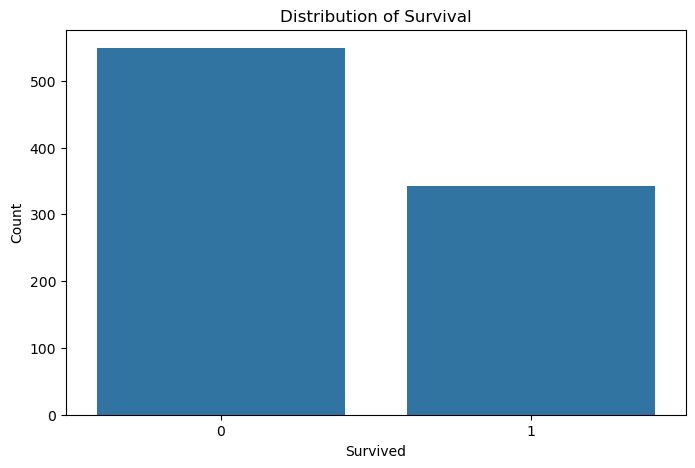

In [447]:
# Plot the distribution of the target variable 'Survived'
plt.figure(figsize=(8,5))
sns.countplot(x='Survived', data=train)
plt.title('Distribution of Survival')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

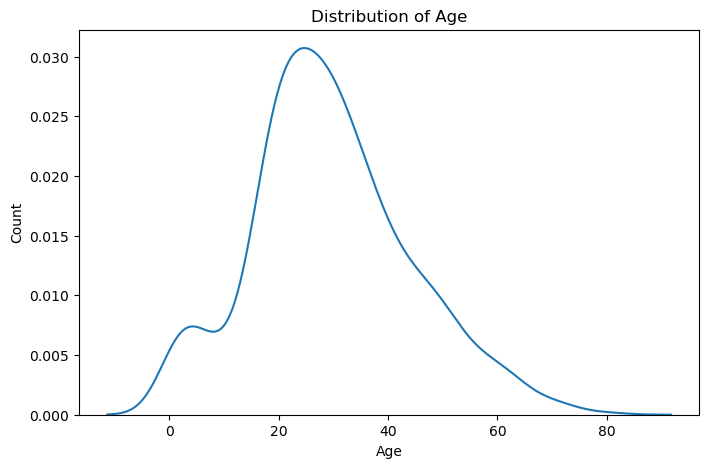

In [448]:
# Plot the distribution of'Age'
plt.figure(figsize=(8,5))
sns.kdeplot(x='Age', data=train)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

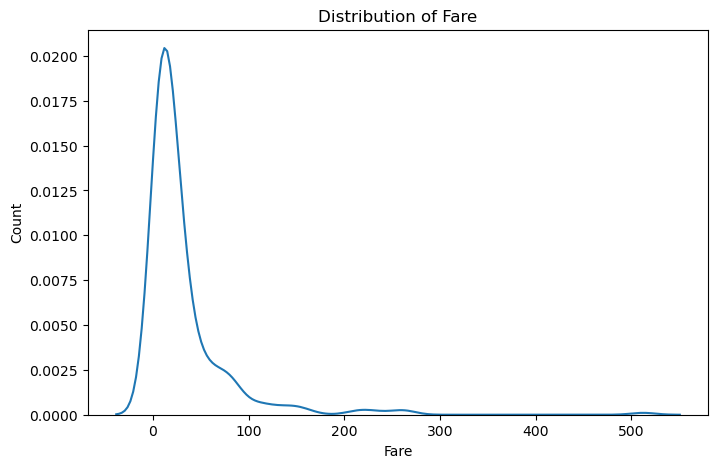

In [449]:
# Plot the distribution of'Fare'
plt.figure(figsize=(8,5))
sns.kdeplot(x='Fare', data=train)
plt.title('Distribution of Fare')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.show()

In [450]:
# Create FamilySize feature including the passenger themselves
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1
test['FamilySize'] = test['SibSp'] + test['Parch'] + 1

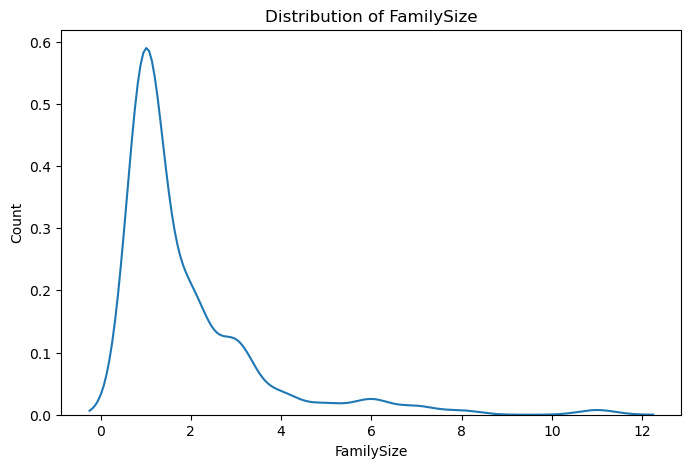

In [451]:
# Plot the distribution of'FamilySize'
plt.figure(figsize=(8,5))
sns.kdeplot(x='FamilySize', data=train)
plt.title('Distribution of FamilySize')
plt.xlabel('FamilySize')
plt.ylabel('Count')
plt.show()

#### Bivariate Analysis

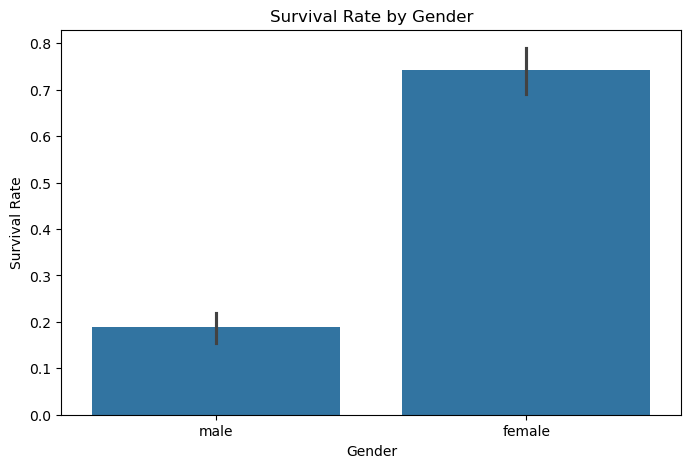

In [453]:
# Survival by Gender
plt.figure(figsize=(8,5))
sns.barplot(x='Sex', y='Survived', data=train)
plt.title('Survival Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Survival Rate')
plt.show()

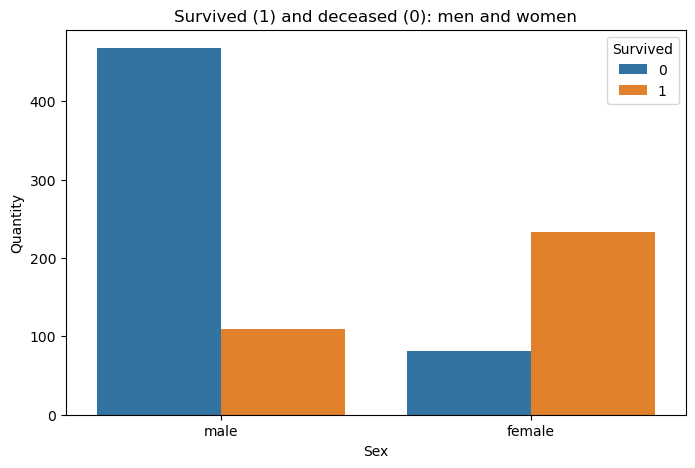

In [454]:
plt.figure(figsize=(8,5))
sns.countplot(x='Sex', hue='Survived', data=train)
plt.xlabel('Sex')
plt.ylabel('Quantity') 
plt.title('Survived (1) and deceased (0): men and women') 
plt.show()

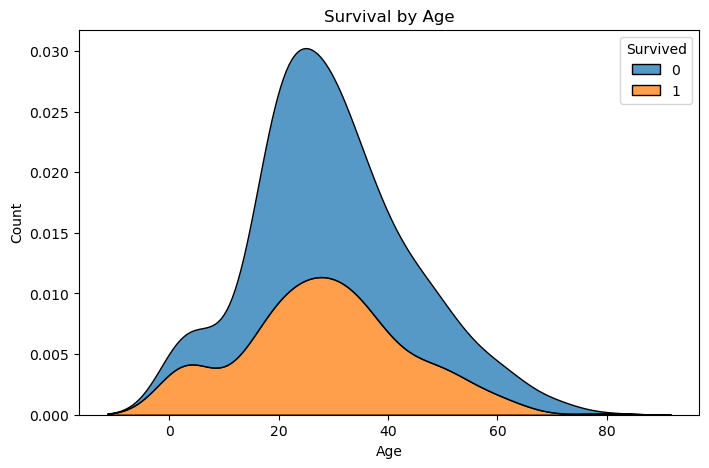

In [455]:
# Survival by Age
plt.figure(figsize=(8,5))
sns.kdeplot(x='Age', hue='Survived', data=train, multiple='stack')
plt.title('Survival by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

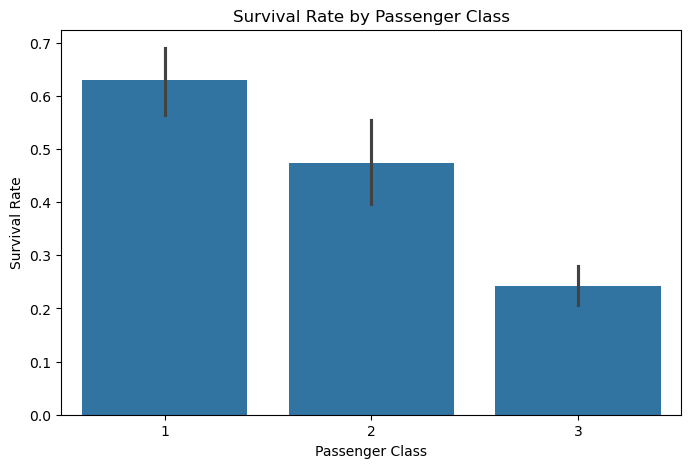

In [456]:
# Survival by Passenger Class
plt.figure(figsize=(8,5))
sns.barplot(x='Pclass', y='Survived', data=train)
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

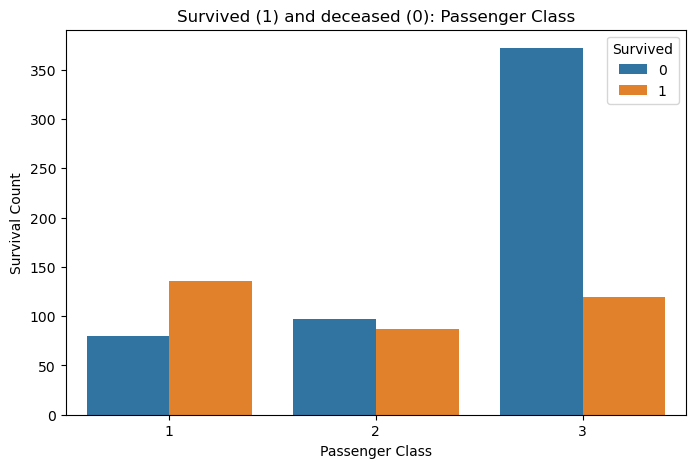

In [457]:
plt.figure(figsize=(8,5))
sns.countplot(x='Pclass', hue='Survived', data=train)
plt.xlabel('Passenger Class')
plt.ylabel('Survival Count') 
plt.title('Survived (1) and deceased (0): Passenger Class') 
plt.show()

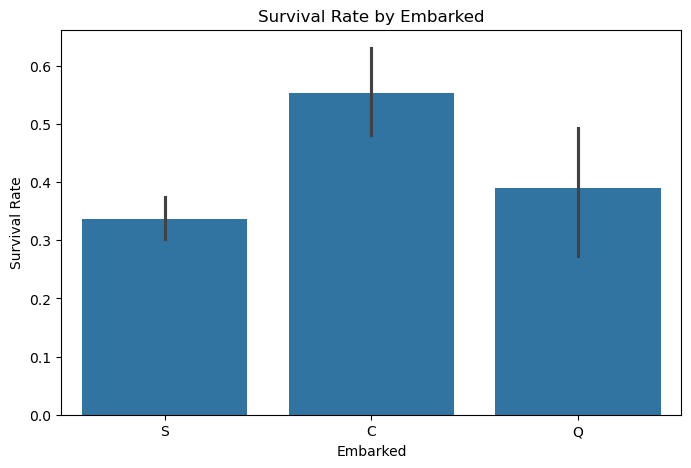

In [458]:
# Survival by Embarked
plt.figure(figsize=(8,5))
sns.barplot(x='Embarked', y='Survived', data=train)
plt.title('Survival Rate by Embarked')
plt.xlabel('Embarked')
plt.ylabel('Survival Rate')
plt.show()

#### Correaltion Heatmap

<Axes: >

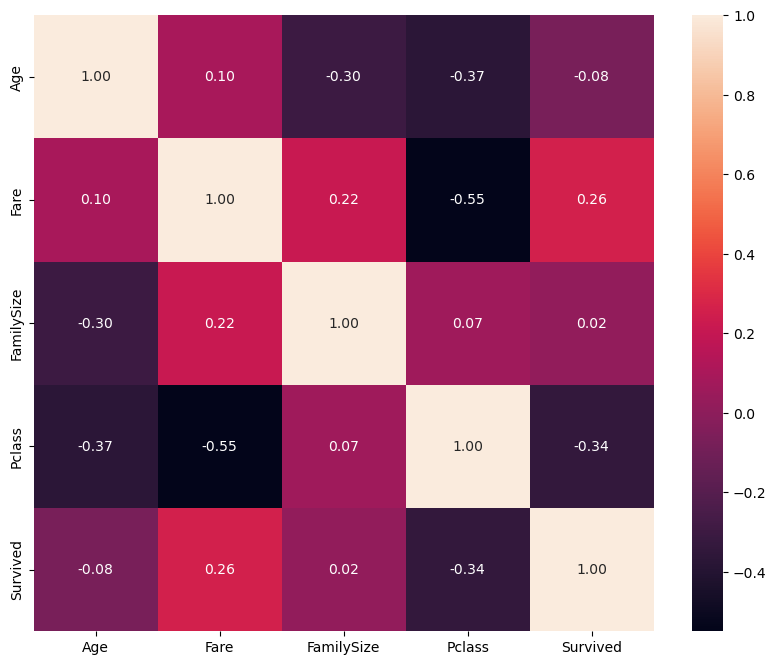

In [460]:
# Correlation heatmap using seaborn
plt.figure(figsize=(10,8))
corr = train[['Age', 'Fare', 'FamilySize', 'Pclass', 'Survived']].corr()
sns.heatmap(corr, annot= True, fmt='.2f')

#### Feature Engineering Insights

Missing Values by Feature: 
Cabin       687
Age         177
Embarked      2
dtype: int64



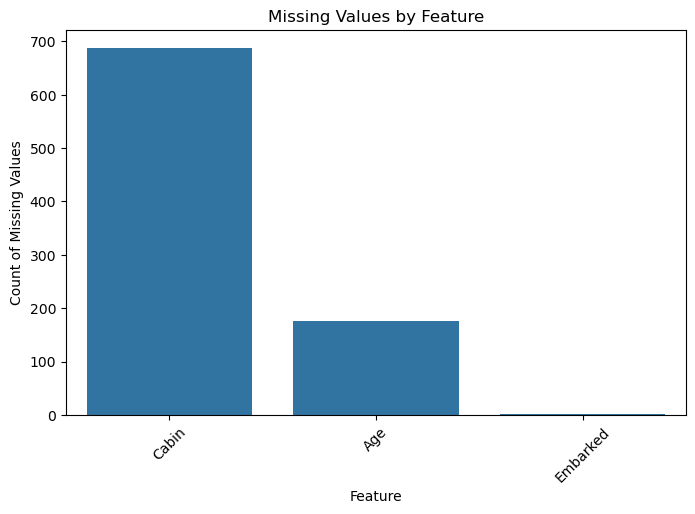

In [462]:
# Missing values vizualization
plt.figure(figsize=(8,5))
missing_data = train.isnull().sum().sort_values(ascending=False)
missing_data = missing_data[missing_data>0]
print(f"Missing Values by Feature: \n{missing_data}\n")
sns.barplot(x=missing_data.index, y=missing_data.values)
plt.xlabel('Feature')
plt.ylabel('Count of Missing Values')
plt.title('Missing Values by Feature')
plt.xticks(rotation=45)
plt.show()

### Preprocessing the data

In [464]:
# Define numeric and categorical features
numeric_features = ['Age', 'Fare', 'SibSp', 'Parch', 'FamilySize']
categorical_features = ['Sex', 'Embarked']

In [465]:
# Define Imputers
# Define SimpleImputer and Robust Scaler for numeric features
numeric_imputer = SimpleImputer(strategy='median')
numeric_scaler = RobustScaler()

# Define SimpleImputer and OneHotEncoder for categorical features
categorical_imputer = SimpleImputer(strategy='most_frequent')
categorical_encoder = OneHotEncoder(drop='first')

In [466]:
# Define preprocessing using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[('imputer', numeric_imputer),
                                ('scaler', numeric_scaler)]), numeric_features),
        ('cat', Pipeline(steps=[('imputer', categorical_imputer),
                                ('encoder', categorical_encoder)]), categorical_features)
    ],
    remainder='passthrough'
)

In [467]:
# Drop Unnecessary Columns
X = train.drop(['Survived', 'Cabin', 'PassengerId', 'Name', 'Ticket'], axis=1)
test_data = test.drop(['Cabin', 'PassengerId', 'Name', 'Ticket'], axis=1)
y = train['Survived']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [468]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize
331,1,male,45.5,0,0,28.5000,S,1
733,2,male,23.0,0,0,13.0000,S,1
382,3,male,32.0,0,0,7.9250,S,1
704,3,male,26.0,1,0,7.8542,S,2
813,3,female,6.0,4,2,31.2750,S,7


### Model Building and Evaluation

In [470]:
# Define classifiers and pipelines
classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42),
    'Support Vector Machine': SVC(probability=True, random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42)
}

In [471]:
# Train and evaluate models
results = {}

# Initialize dictionary for ROC curve data, Confusion_Matrix, precision-recall
roc_data = {}
cm_data = {}
pr_data = {}

for name, clf in classifiers.items():
    model_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', clf)
    ])
    model_pipeline.fit(X_train, y_train)
    y_pred_proba = model_pipeline.predict_proba(X_val)[:, 1]
    y_pred = model_pipeline.predict(X_val)
    
    accuracy = accuracy_score(y_val, y_pred)

    fpr, tpr, _ = roc_curve(y_val, y_pred_proba)

    roc_auc = roc_auc_score(y_val, y_pred_proba)
    roc_data[name] = (fpr, tpr, roc_auc)

    results[name] = {"Accuracy": accuracy, "ROC AUC": roc_auc}

    # Compute confusion matrix
    cm = confusion_matrix(y_val, y_pred)
    cm_data[name] = cm


    # Compute precision, recall, and thresholds
    precision, recall, _ = precision_recall_curve(y_val, y_pred_proba)
    average_precision = average_precision_score(y_val, y_pred_proba)
    pr_data[name] = (precision, recall, average_precision)

In [472]:
# Display results and find best model
results_df = pd.DataFrame(results).T
print("Model Performance Comaprison:")
print(results_df)

Model Performance Comaprison:
                        Accuracy   ROC AUC
Logistic Regression     0.810056  0.882625
Random Forest           0.804469  0.892021
Support Vector Machine  0.810056  0.828314
K-Nearest Neighbors     0.815642  0.858816
Decision Tree           0.793296  0.816538
Gradient Boosting       0.804469  0.887902


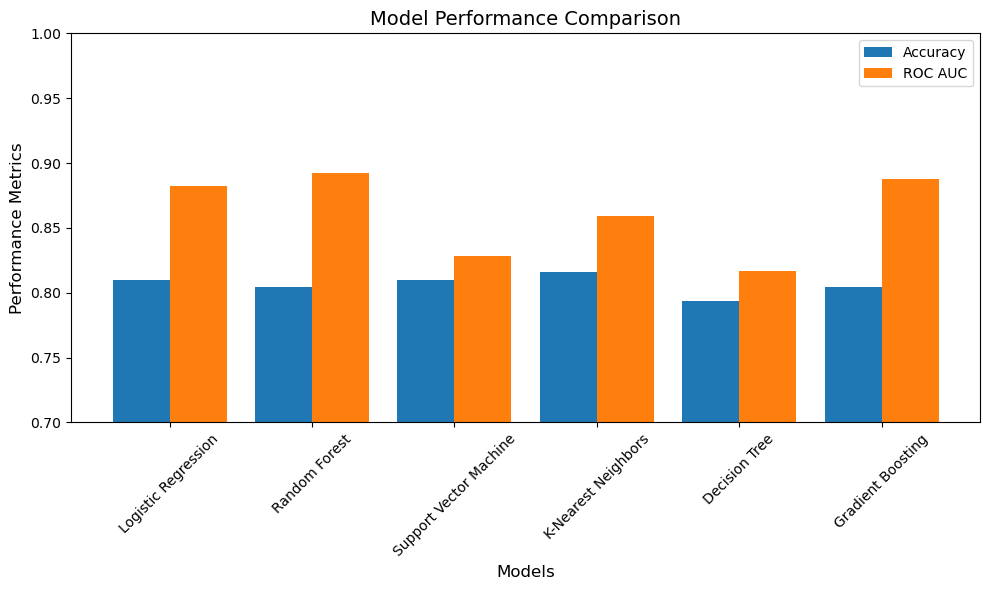

In [473]:
# Extract model names and performance metrics
models = list(results.keys())
accuracies = [results[model]["Accuracy"] for model in models]
roc_aucs = [results[model]["ROC AUC"] for model in models]

# Plotting
plt.figure(figsize=(10, 6))
x = range(len(models))

# Plot Accuracy and ROC AUC
plt.bar(x, accuracies, width=0.4, label='Accuracy', align='center')
plt.bar([i + 0.4 for i in x], roc_aucs, width=0.4, label='ROC AUC', align='center')

# Formatting
plt.xlabel('Models', fontsize=12)
plt.ylabel('Performance Metrics', fontsize=12)
plt.title('Model Performance Comparison', fontsize=14)
plt.xticks([i + 0.2 for i in x], models, rotation=45, fontsize=10)
plt.ylim(0.7, 1)
plt.legend()
plt.tight_layout()

# Show plot
plt.show()

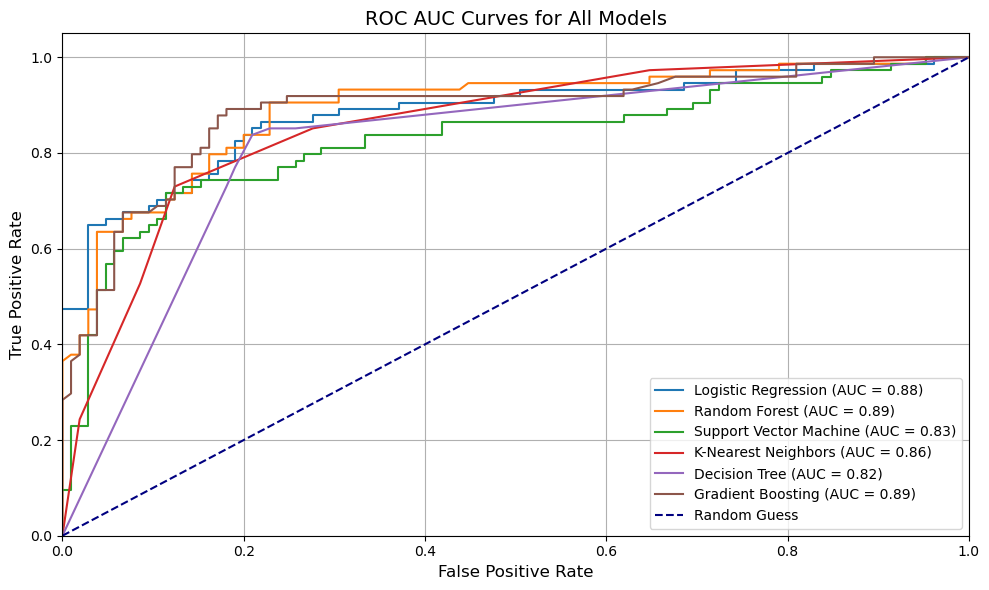

In [474]:
# Plot ROC curves
plt.figure(figsize=(10, 6))

for model, (fpr, tpr, roc_auc) in roc_data.items():
    plt.plot(fpr, tpr, label=f"{model} (AUC = {roc_auc:.2f})")

# Random Guess line
plt.plot([0, 1], [0, 1], color="navy", linestyle="--", label="Random Guess")

# Formatting
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.title("ROC AUC Curves for All Models", fontsize=14)
plt.legend(loc="lower right")
plt.grid()
plt.tight_layout()

# Show plot
plt.show()


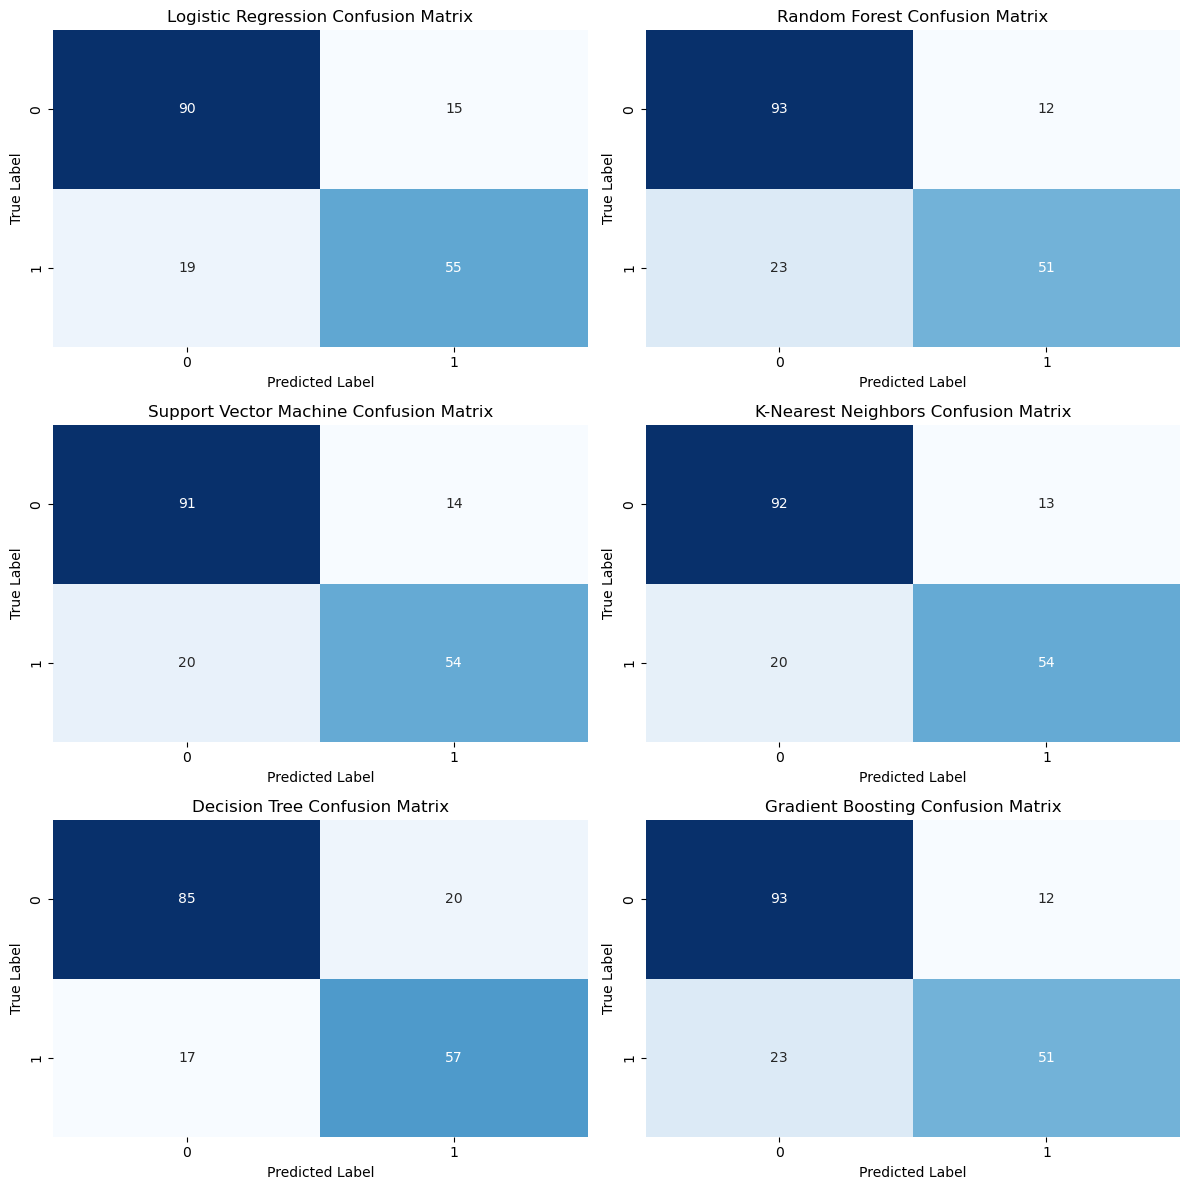

In [475]:
# Loop through classifiers to compute confusion matrices
fig, axes = plt.subplots(3, 2, figsize=(12, 12))
axes = axes.flatten()

for idx, (name, clf) in enumerate(classifiers.items()):
    sns.heatmap(cm_data[name], annot=True, fmt="d", cmap="Blues", cbar=False, ax=axes[idx])
    axes[idx].set_title(f"{name} Confusion Matrix")
    axes[idx].set_xlabel("Predicted Label")
    axes[idx].set_ylabel("True Label")

# Adjust layout
plt.tight_layout()
plt.show()


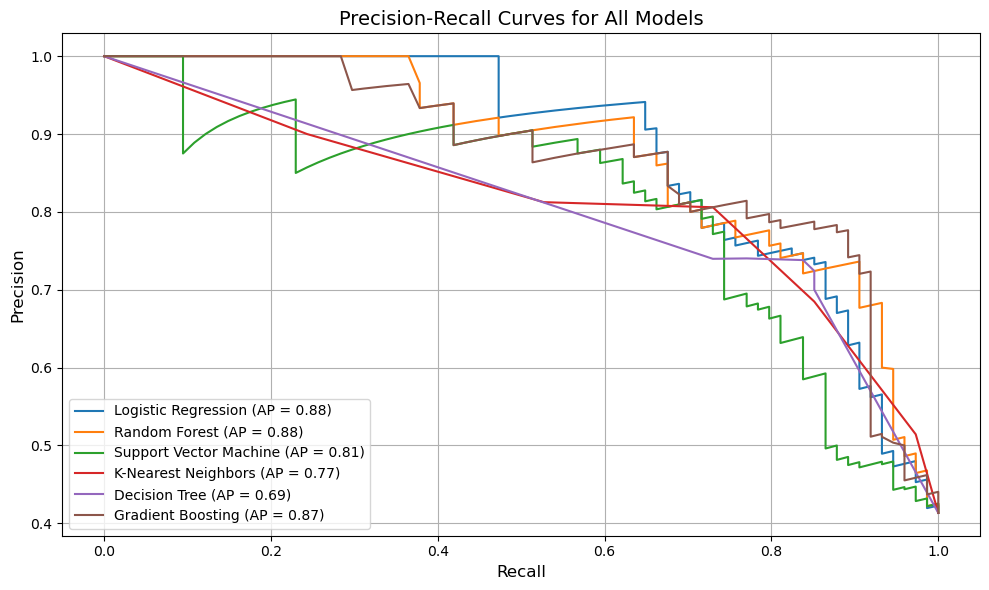

In [476]:
# Plot precision-recall curves
plt.figure(figsize=(10, 6))

for model, (precision, recall, average_precision) in pr_data.items():
    plt.plot(recall, precision, label=f"{model} (AP = {average_precision:.2f})")

# Plot formatting
plt.xlabel("Recall", fontsize=12)
plt.ylabel("Precision", fontsize=12)
plt.title("Precision-Recall Curves for All Models", fontsize=14)
plt.legend(loc="lower left")
plt.grid()
plt.tight_layout()

# Show plot
plt.show()


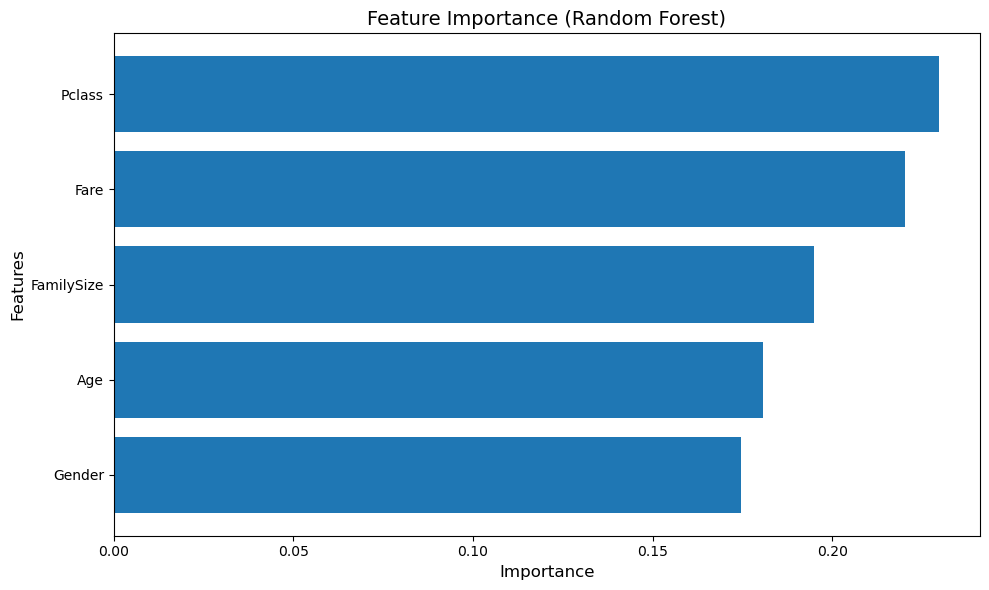

In [477]:
feature_names = ['Age', 'Pclass', 'Fare', 'FamilySize', 'Gender']

# Example Random Forest model for demonstration
random_forest_model = RandomForestClassifier()
random_forest_model.fit(np.random.rand(100, len(feature_names)), np.random.randint(0, 2, 100))

# Extract feature importances
importances = random_forest_model.feature_importances_
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], align='center')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.title('Feature Importance (Random Forest)', fontsize=14)
plt.tight_layout()

# Show plot
plt.show()


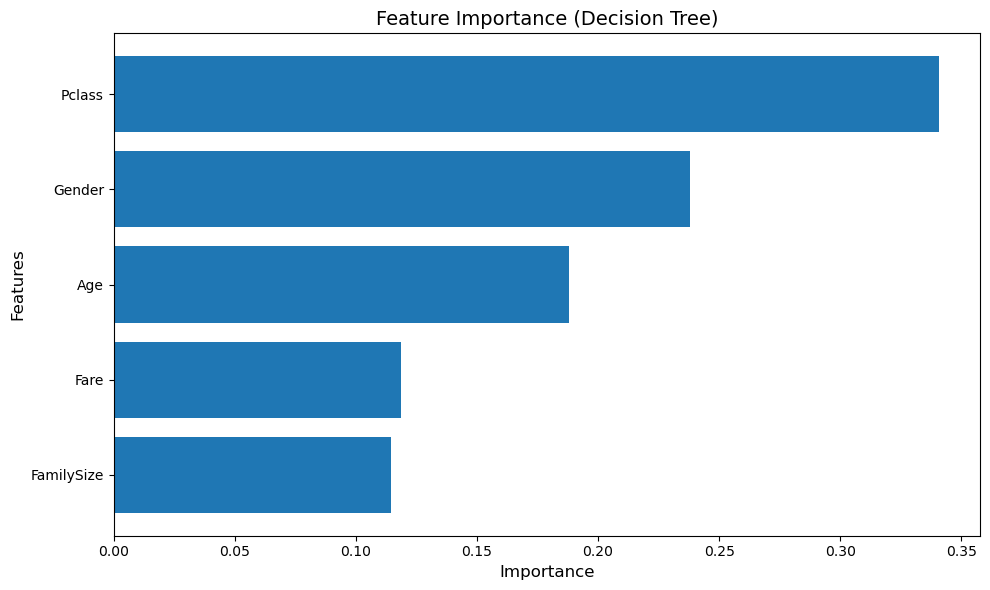

In [478]:
# Example Decision Tree model for demonstration
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(np.random.rand(100, len(feature_names)), np.random.randint(0, 2, 100))

# Extract feature importances
importances = decision_tree_model.feature_importances_
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], align='center')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.title('Feature Importance (Decision Tree)', fontsize=14)
plt.tight_layout()

# Show plot
plt.show()

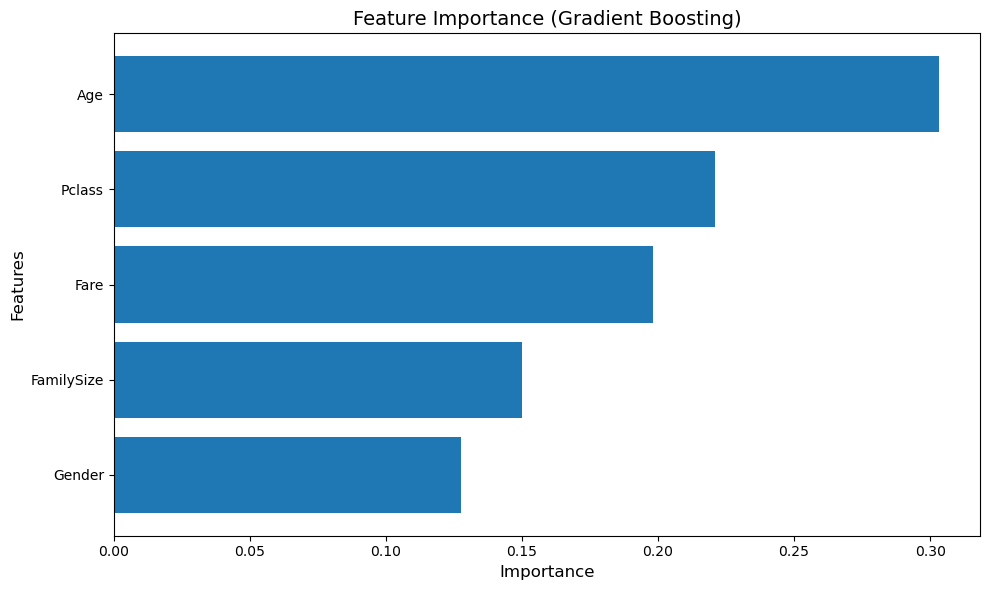

In [479]:
# Example Gradient Boosting model for demonstration
gradient_boosting_model = GradientBoostingClassifier()
gradient_boosting_model.fit(np.random.rand(100, len(feature_names)), np.random.randint(0, 2, 100))

# Extract feature importances
importances = gradient_boosting_model.feature_importances_
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], align='center')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.title('Feature Importance (Gradient Boosting)', fontsize=14)
plt.tight_layout()

# Show plot
plt.show()

## Save and Load Model

In [481]:
# Select the best model based on ROC AUC (e.g., Random Forest)
model_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42))
    ])

# Fit the model
model_pipeline.fit(X_train, y_train)

# Save the model
dump(model_pipeline, 'best_model_pipeline.joblib')

['best_model_pipeline.joblib']

In [482]:
# Load the model
model = load('best_model_pipeline.joblib')

In [483]:
# Predict with test data
test_predictions = model.predict(test_data)

# Making a new dataframe called Submission
submission = pd.DataFrame({
    "PassengerId": test['PassengerId'],
    "Survived": test_predictions
})

# Save the submission to a CSV file
submission.to_csv('submission.csv', index=False)

## Analysis:

#### 1. Accuracy:
- **Best:** K-Nearest Neighbors (`0.8156`)
- SVM and Logistic Regression also perform well with an accuracy of `0.8101`.

#### 2. ROC AUC:
- **Best:** Random Forest (`0.8923`)
- Gradient Boosting is close behind with a ROC AUC of `0.8879`.

### Model Selection: Random Forest

Given the high ROC AUC, Random Forest was chosen as the final model for deployment.

---

## Saving the Model

We saved the Random Forest model using `joblib` for future use.

---

## Submission

Predictions were generated on the test set, and a `submission.csv` file was created for submission to the Kaggle competition.

---


## Conclusion

- **Random Forest** emerged as the best model with the highest ROC AUC of 0.8923, indicating its superior ability to distinguish between survivors and non-survivors.
- Although **K-Nearest Neighbors** achieved the highest accuracy at 0.8156, its ROC AUC was slightly lower compared to Random Forest.
- The Random Forest model was selected for deployment due to its balance of high accuracy and ROC AUC performance.
- The model was saved for future use, and predictions were generated and submitted for the Kaggle competition.


## Socio-Economic Insights
-	Gender: Female passengers had higher survival rates (over 70%) compared to males.
-	Class: First-class passengers had the highest survival rates, while third-class passengers were the most vulnerable.
-	Fare: Higher fare values positively correlated with survival probability, reflecting socio-economic privilege.
-	Family Size: Medium-sized families (2–4 members) showed higher survival rates compared to individuals or large families.
